In [1]:
import numpy as np
import pandas as pd

def neighbor_joining(df):
    # Convert the DataFrame to a numpy matrix
    dist_matrix = df.to_numpy()
    taxa = list(df.index)
    tree = {}

    while len(taxa) > 2:
        n = len(taxa)
        Q_matrix = np.zeros((n, n))
        print(n)
        
        # Compute the Q matrix
        sumi = [np.sum(dist_matrix[i]) for i in range(n)]
        
        for i in range(n):
            for j in range(n):
                if i != j:
                    Q_matrix[i][j] = (n - 2) * dist_matrix[i][j] - sumi[i] - sumi[j]
        
        # Find the pair with the smallest Q value
        min_i, min_j = np.unravel_index(np.argmin(Q_matrix), Q_matrix.shape)
        
        # Compute the distance to the new node
        new_dist = (dist_matrix[min_i][min_j] +  (sumi[min_i] - sumi[min_j]) / (n - 2)) / 2
        
        # Update the tree
        new_node = taxa[min_i] + '.' + taxa[min_j]
        tree[new_node] = {taxa[min_i]: new_dist,
                          taxa[min_j]: dist_matrix[min_i][min_j] - new_dist}
        
        # Update the distance matrix
        new_row = [(dist_matrix[min_i][k] + dist_matrix[min_j][k] - dist_matrix[min_i][min_j]) / 2 for k in range(n) if k != min_i and k != min_j]
        new_dist_matrix = np.delete(dist_matrix, [min_i, min_j], axis=0)
        new_dist_matrix = np.delete(new_dist_matrix, [min_i, min_j], axis=1)
        new_dist_matrix = np.vstack((new_dist_matrix, new_row))
        new_row.append(0)
        new_dist_matrix = np.column_stack((new_dist_matrix, new_row))
        
        # Update the taxa list
        new_taxa = taxa[:]
        new_taxa.remove(taxa[min_i])
        new_taxa.remove(taxa[min_j])
        new_taxa.append(new_node)
        
        # Update the distance matrix and taxa list
        dist_matrix = new_dist_matrix
        taxa = new_taxa
        
    # Connect the final two nodes
    tree[taxa[1]][taxa[0]] = dist_matrix[0, 1]
    
    return tree

In [36]:
sufix = '-v3'
RAW_PATH = '../examples/logs/phylo%s/DiseasePhyloReports.tsv'%sufix
raw_data = pd.read_csv(RAW_PATH, sep = "\t|,", engine='python')
infectious_data = raw_data[raw_data['diseaseStatus'] == 'Infectious'].reset_index()
name = []
for seq in infectious_data['diseaseSeq']:
    name.append(seq.split('.')[-1])
dm = np.load('dm-v3.npy')

In [29]:
# Randomly Select
import random
random.seed(0)
selected_rows = [i for i in range(len(infectious_data)) if random.random()<0.3]
selected_names = []
for i in selected_rows:
    name = infectious_data.iloc[i]['diseaseSeq']
    selected_names.append(name.split('.')[-1])
print(len(selected_names))
df = df[df.index.isin(selected_names)]
df = df[selected_names]
df

1281


,2279-1,4819-1,4439-1,3230-1,4426-1,3287-1,3555-1,733-1,4828-1,2228-1,...,2978-1,3235-1,1810-1,2891-1,4519-1,2914-1,1330-1,1587-1,1716-1,1626-1
2279-1,0.0,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4819-1,1.0,0.000000,0.666667,0.333333,1.0,0.750000,0.750000,1.0,0.750000,0.750000,...,0.916667,0.909091,0.909091,0.909091,0.909091,0.916667,0.800000,0.928571,0.923077,0.933333
4439-1,1.0,0.666667,0.000000,0.750000,1.0,0.750000,0.750000,1.0,0.750000,0.750000,...,0.916667,0.909091,0.909091,0.909091,0.909091,0.916667,0.909091,0.928571,0.923077,0.933333
3230-1,1.0,0.333333,0.750000,0.000000,1.0,0.800000,0.800000,1.0,0.800000,0.800000,...,0.923077,0.916667,0.916667,0.916667,0.916667,0.923077,0.700000,0.933333,0.928571,0.937500
4426-1,1.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914-1,1.0,0.916667,0.916667,0.923077,1.0,0.833333,0.833333,1.0,0.923077,0.923077,...,0.952381,0.950000,0.950000,0.950000,0.950000,0.000000,0.950000,0.956522,0.954545,0.958333
1330-1,1.0,0.800000,0.909091,0.700000,1.0,0.916667,0.916667,1.0,0.916667,0.916667,...,0.950000,0.947368,0.947368,0.947368,0.947368,0.950000,0.000000,0.954545,0.952381,0.956522
1587-1,1.0,0.928571,0.928571,0.933333,1.0,0.933333,0.933333,1.0,0.933333,0.933333,...,0.666667,0.954545,0.954545,0.954545,0.904762,0.956522,0.954545,0.000000,0.684211,0.071429
1716-1,1.0,0.923077,0.923077,0.928571,1.0,0.928571,0.928571,1.0,0.928571,0.928571,...,0.083333,0.952381,0.952381,0.952381,0.900000,0.954545,0.952381,0.684211,0.000000,0.700000


In [30]:
result_tree = neighbor_joining(df)
np.save('sp-treedict-v3.npy',result_tree)

1281
1280
1279
1278
1277
1276
1275
1274
1273
1272
1271
1270
1269
1268
1267
1266
1265
1264
1263
1262
1261
1260
1259
1258
1257
1256
1255
1254
1253
1252
1251
1250
1249
1248
1247
1246
1245
1244
1243
1242
1241
1240
1239
1238
1237
1236
1235
1234
1233
1232
1231
1230
1229
1228
1227
1226
1225
1224
1223
1222
1221
1220
1219
1218
1217
1216
1215
1214
1213
1212
1211
1210
1209
1208
1207
1206
1205
1204
1203
1202
1201
1200
1199
1198
1197
1196
1195
1194
1193
1192
1191
1190
1189
1188
1187
1186
1185
1184
1183
1182
1181
1180
1179
1178
1177
1176
1175
1174
1173
1172
1171
1170
1169
1168
1167
1166
1165
1164
1163
1162
1161
1160
1159
1158
1157
1156
1155
1154
1153
1152
1151
1150
1149
1148
1147
1146
1145
1144
1143
1142
1141
1140
1139
1138
1137
1136
1135
1134
1133
1132
1131
1130
1129
1128
1127
1126
1125
1124
1123
1122
1121
1120
1119
1118
1117
1116
1115
1114
1113
1112
1111
1110
1109
1108
1107
1106
1105
1104
1103
1102
1101
1100
1099
1098
1097
1096
1095
1094
1093
1092
1091
1090
1089
1088
1087
1086
1085
1084
1083
1082


In [32]:
from Bio import Phylo
from Bio.Phylo import PhyloXML
from Bio.Phylo.Newick import Tree, Clade

def build_clade(node, tree_dict):
    if node not in tree_dict:
        return Clade(name=node)
    
    clade = Clade()
    for child, distance in tree_dict[node].items():
        child_clade = build_clade(child, tree_dict)
        child_clade.branch_length = distance
        clade.clades.append(child_clade)
    
    return clade

tree_dict = result_tree
root = list(tree_dict.keys())[-1]
root_clade = build_clade(root, tree_dict)
tree = Tree(root=root_clade)

In [33]:
phyloxml_tree = PhyloXML.Phylogeny.from_tree(tree)
Phylo.write([phyloxml_tree], 'sp-tree.xml', 'phyloxml')

1

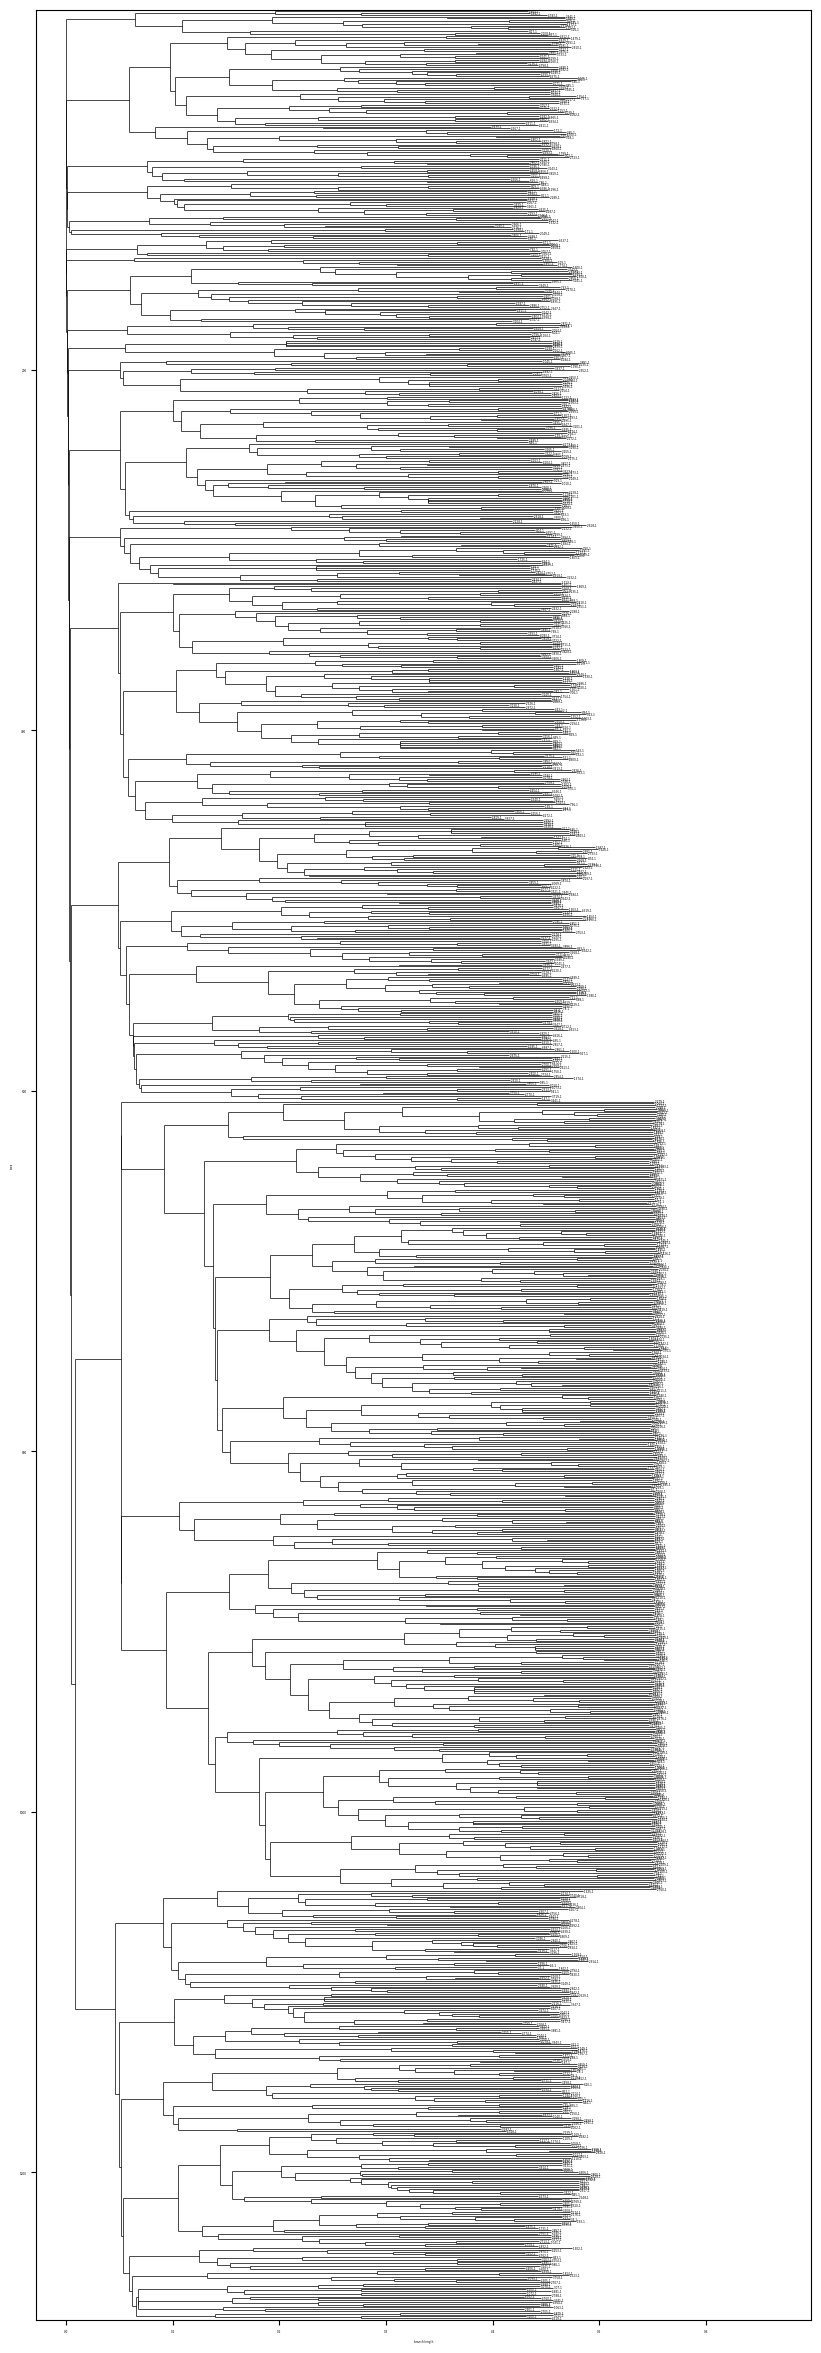

In [34]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['lines.linewidth'] = 0.5
matplotlib.rcParams['font.size'] = 2
fig,ax = plt.subplots(1,figsize=(10, 30))
Phylo.draw(tree, axes = ax, do_show=False)
plt.savefig("sp-phylo-v3.pdf", format="pdf",bbox_inches="tight")

In [49]:
# Biased Sample
name = []
for seq in infectious_data['diseaseSeq']:
    name.append(seq.split('.')[-1])
dm = np.load('dm-v3.npy')
df = pd.DataFrame(data = dm, index=name, columns=name)

bias_sp_data = infectious_data[infectious_data['Reported']].reset_index()
selected_names = [seq.split('.')[-1] for seq in bias_sp_data['diseaseSeq'] if random.random() < 0.3]
df = df[df.index.isin(selected_names)]
df = df[selected_names]
df

In [51]:
result_tree = neighbor_joining(df)
np.save('b-sp-treedict-v3.npy',result_tree)

1044
1043
1042
1041
1040
1039
1038
1037
1036
1035
1034
1033
1032
1031
1030
1029
1028
1027
1026
1025
1024
1023
1022
1021
1020
1019
1018
1017
1016
1015
1014
1013
1012
1011
1010
1009
1008
1007
1006
1005
1004
1003
1002
1001
1000
999
998
997
996
995
994
993
992
991
990
989
988
987
986
985
984
983
982
981
980
979
978
977
976
975
974
973
972
971
970
969
968
967
966
965
964
963
962
961
960
959
958
957
956
955
954
953
952
951
950
949
948
947
946
945
944
943
942
941
940
939
938
937
936
935
934
933
932
931
930
929
928
927
926
925
924
923
922
921
920
919
918
917
916
915
914
913
912
911
910
909
908
907
906
905
904
903
902
901
900
899
898
897
896
895
894
893
892
891
890
889
888
887
886
885
884
883
882
881
880
879
878
877
876
875
874
873
872
871
870
869
868
867
866
865
864
863
862
861
860
859
858
857
856
855
854
853
852
851
850
849
848
847
846
845
844
843
842
841
840
839
838
837
836
835
834
833
832
831
830
829
828
827
826
825
824
823
822
821
820
819
818
817
816
815
814
813
812
811
810
809
808
807
806

In [52]:
tree_dict = result_tree
root = list(tree_dict.keys())[-1]
root_clade = build_clade(root, tree_dict)
tree = Tree(root=root_clade)
phyloxml_tree = PhyloXML.Phylogeny.from_tree(tree)
Phylo.write([phyloxml_tree], 'b-sp-tree.xml', 'phyloxml')

1

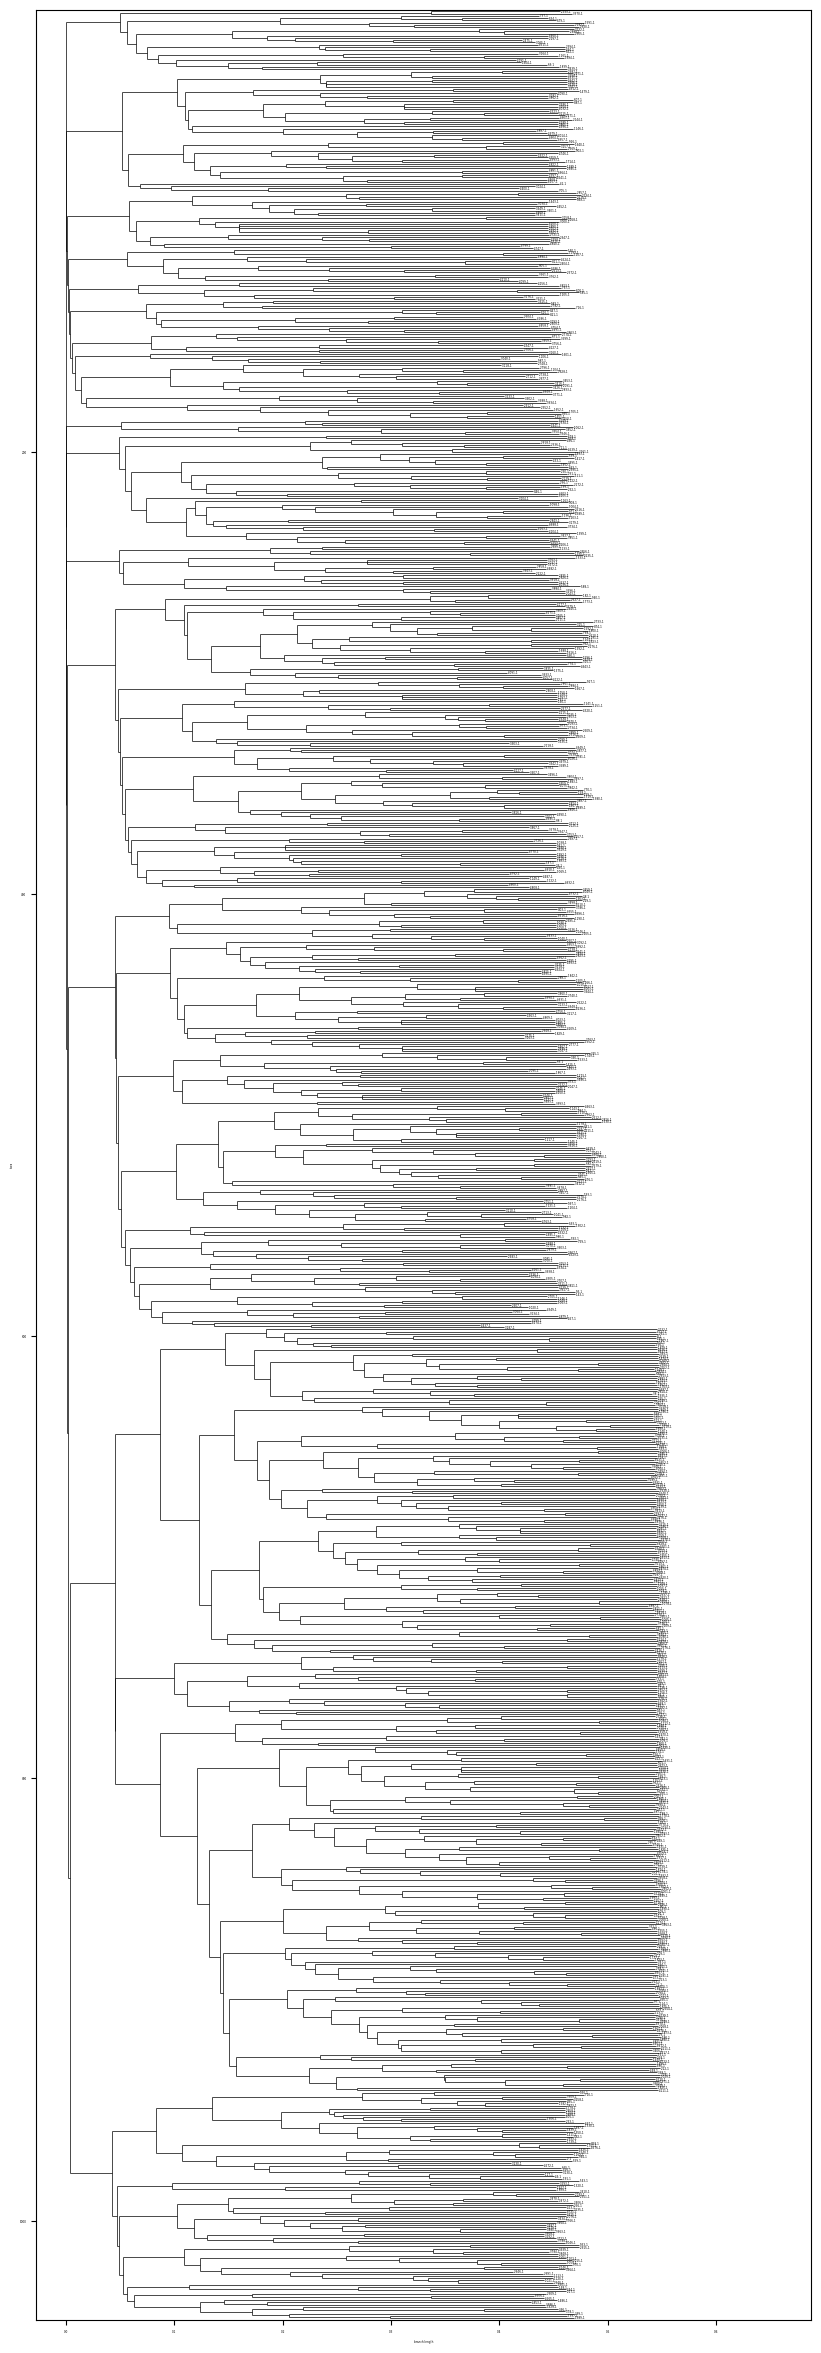

In [53]:
fig,ax = plt.subplots(1,figsize=(10, 30))
Phylo.draw(tree, axes = ax, do_show=False)
plt.savefig("b-sp-phylo-v3.pdf", format="pdf",bbox_inches="tight")